<a href="https://colab.research.google.com/github/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/2_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

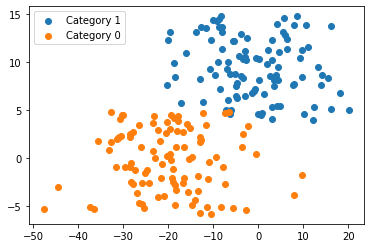

In [93]:
x1 = np.random.randn(100,1) * 10
y1 = np.random.uniform(low=4, high=15, size=(100,1))

x0 = np.random.randn(100,1) * 10 - 20
y0 = np.random.uniform(low=-6, high=5, size=(100,1))

data  = np.concatenate((np.concatenate((x1, y1), axis=1), np.concatenate((x0, y0), axis=1)), axis=0)
label = np.concatenate((np.ones(100), np.zeros(100)))

plt.scatter(x1, y1, label="Category 1")
plt.scatter(x0, y0, label="Category 0")
plt.legend()
plt.show()

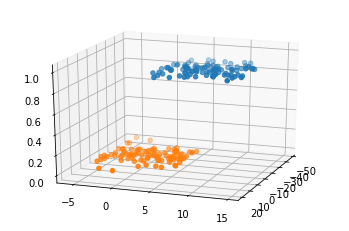

In [98]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(x1, y1, np.ones_like(x1))
ax.scatter(x0, y0, np.zeros_like(x0))
ax.view_init(20, 20)

---
Sigmoid function

\\[ s(x) = \frac{1}{1 + e^{-x}} \\]

The derivative is :
\\[ \dot{s}(x) = s(x) \times (1 - s(x)) \\]

In [6]:
def sigmoid(inp):
  return 1/(1 + np.exp(-inp))

def d_sigmoid(inp):
  return sigmoid(inp) * (1 - sigmoid(inp))

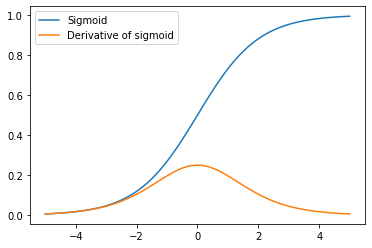

In [7]:
temp = np.linspace(-5, 5, 101)

plt.plot(temp, sigmoid(temp), label="Sigmoid")
plt.plot(temp, d_sigmoid(temp), label="Derivative of sigmoid")
plt.legend()
plt.show()

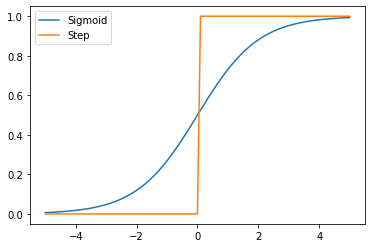

In [8]:
plt.plot(temp, sigmoid(temp), label="Sigmoid")
plt.plot(temp, temp > 0, label="Step")
plt.legend()
plt.show()

In [12]:
def vis_boundary(mx, my, b):
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)

  Z = sigmoid(mx*X + my*Y + b)

  c = plt.contourf(X, Y, Z, cmap='plasma')
  plt.colorbar(c)
  
  inp1 = np.asarray([data[i] for i in range(data.shape[0]) if label[i]])
  inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not label[i]])
  
  plt.scatter(inp0[:,0], inp0[:,1], label="Category 0", color="blue")
  plt.scatter(inp1[:,0], inp1[:,1], label="Category 1", color="red")
  plt.legend()
  plt.show()

In [49]:
def vis_boundary3D(mx, my, b):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)

  Z = sigmoid(mx*X + my*Y + b)

  inp1 = np.asarray([data[i] for i in range(data.shape[0]) if label[i]])
  inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not label[i]])

  
  ax.scatter(inp0[:,0], inp0[:,1], np.zeros_like(inp0[:,0]), label="Category 0", color="blue")
  ax.scatter(inp1[:,0], inp1[:,1], np.ones_like(inp1[:,0]), label="Category 1", color="red")
  ax.legend()
  c = ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.5)
  ax.view_init(20, 70)
  fig.show()

In [116]:
interact(vis_boundary, mx = widgets.FloatSlider(min=-10, max=10, value=1), my = widgets.FloatSlider(min=-10, max=10, value=1), b = widgets.FloatSlider(min=-50, max=50))

interactive(children=(FloatSlider(value=1.0, description='mx', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

<function __main__.vis_boundary>

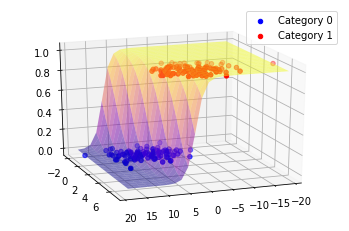

In [70]:
vis_boundary3D(-1,-1,10)

---
# Binary crossentropy loss

\\[ E(y, \hat{y}) = (\hat{y} \times -\log{y}) + ((1 - \hat{y}) \times - \log{(1-y)}) \\]

\\[ E(y, \hat{y}) = \frac{\sum_{i=0}^{N-1}((\hat{y_i} \times -\log{y_i}) + ((1 - \hat{y_i}) \times - \log{(1-y_i)}))}{N} \\]

That does look quite intimidating! But, we can make sense of it. Consider this :

$ \hat{y}_i $ can only have values 0 or 1. So, either one of the terms $(\hat{y_i} \times -\log{y_i})$ or $((1 - \hat{y_i}) \times - \log{(1-y_i)})$ appear at one time 

- When $ \hat{y}_i = 1 , E(y, \hat{y}) = -log(y) $

- When $ \hat{y}_i = 0 , E(y, \hat{y}) = -log(1 - y) $

For gradient descent, we need to know its gradient. It comes out to be :

\\[ \frac{\partial E (y, \hat{y})}{\partial y} = \frac{-\hat{y}}{y} + \frac{1-\hat{y}}{1-y} \\]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


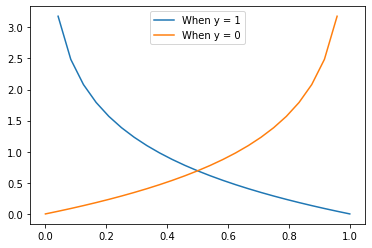

In [104]:
temp = np.linspace(0, 1, 25)
plt.plot(temp, -np.log(temp), label="When y = 1")
plt.plot(temp, -np.log(1-temp), label="When y = 0")
plt.legend()
plt.show()